In [53]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pickle
import natsort
import os
from scipy.optimize import curve_fit
from datetime import date
import re

In [55]:
today = date.today()
filePath = "../../data_source/data/sonde/resultEffDose/2022-09-10"
file = os.path.join(filePath, natsort.natsorted(os.listdir(filePath))[-1])

In [56]:
regex = re.compile("-*\d+_\d+")
# regexValue = re.compile("\d*e\d*\sSv/source\s\d*e*\d")
regexValue = re.compile(".*\sSv/source\s.*")

cases = []
values = []
with open(file, "r") as f:
    lines = f.readlines()
    for line in lines:
        case = regex.search(line)
        value = regexValue.search(line)
        if case:
            # print(case.group(0))
            cases.append(case.group(0))
        if value:
            avgEff = value.group(0).split()[0]
            avgEffRelErr = value.group(0).split()[2]
            # print(value.group(0).split())
            values.append((avgEff, avgEffRelErr))

In [57]:
data = zip(cases, values)

In [58]:
# for pair in data:
#     print(pair)

In [59]:
activity = 3 # Ci
neutrons_per_decay = 2.4 * 10**6 # 2,400,000 neutrons per 1 Ci of Americium-241
to_micro_Sv = 1.e6 # Sv to microSv

In [60]:
df = dict()

for d in data:
    case = d[0]
    position = d[0].split("_")[0]
    yDistance = d[0].split("_")[1]
    EDR = float(d[1][0]) * activity * neutrons_per_decay * to_micro_Sv
    RelErr = float(d[1][1])
    df[case] = (position, yDistance, EDR, RelErr)

df = pd.DataFrame(df)

In [61]:
# Transpose the DataFrame
df = df.T

In [62]:
# set the columns in proper names
df.columns = (["Position", "yDistance", "EDR", "RelErr"])

In [63]:
# change from str(object type) to int64 type
df["yDistance"] = pd.to_numeric(df["yDistance"])
df["Position"] = pd.to_numeric(df["Position"])
df["EDR"] = pd.to_numeric(df["EDR"])
df["RelErr"] = pd.to_numeric(df["RelErr"])
df.head(5)

,Position,yDistance,EDR,RelErr
20_200,20,200,0.037472,0.037400
20_190,20,190,0.040239,0.033859
20_180,20,180,0.040228,0.028138
20_170,20,170,0.041622,0.033216
20_160,20,160,0.051186,0.035474


In [64]:
# Plotting?
x = df["yDistance"].values
y = df["EDR"].values
yerr = df["RelErr"].values * y

(array([100., 120., 140., 160., 180., 200., 220.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

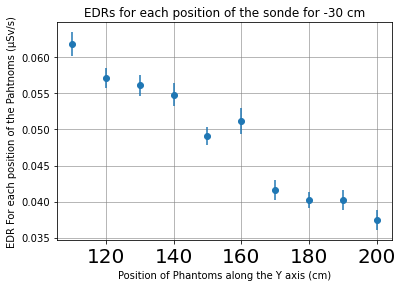

In [65]:
# divide into 100 and -30 case
### for -30 cm case
length = int(len(x) * 0.5)
newx = x[:length]
newy = y[:length]
newyerr = yerr[:length]

plt.errorbar(x=newx, y=newy, yerr=newyerr, fmt = "o")
plt.grid(alpha=0.7, color="grey")
plt.xlabel("Position of Phantoms along the Y axis (cm)")
plt.ylabel("EDR For each position of the Pahtnoms (\u03BCSv/s)")
plt.title("EDRs for each position of the sonde for -30 cm")
plt.xticks(fontsize=20)

Text(0.5, 1.0, 'EDRs for each position of the sonde for 100 cm')

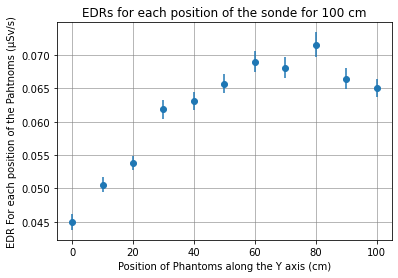

In [66]:
### for 100 cm case
length = int(len(x) * 0.5)
newx = x[length:]
newy = y[length:]
newyerr = yerr[length:]

plt.errorbar(x=newx, y=newy, yerr=newyerr, fmt = "o")
plt.grid(alpha=0.7, color="grey")
plt.xlabel("Position of Phantoms along the Y axis (cm)")
plt.ylabel("EDR For each position of the Pahtnoms (\u03BCSv/s)")
plt.title("EDRs for each position of the sonde for 100 cm")

In [42]:
# divide into 100 and -30 case
### for all points
length = len(x)
newx = x[:length]
newy = y[:length]
newyerr = yerr[:length]

plt.errorbar(x=newx, y=newy, yerr=newyerr, fmt = "o")
plt.grid(alpha=0.7, color="grey")
plt.xlabel("Position of Phantoms along the Y axis (cm)")
plt.ylabel("EDR For each position of the Pahtnoms (\u03BCSv/s)")
plt.title("EDRs for each position of the sonde for -30 cm")
plt.xticks(fontsize=20)

array([200, 190, 180, 170, 160, 150, 140, 130, 120, 110, 100,  90,  80,
        70,  60,  50,  40,  30,  20,  10,   0, 200, 190, 180, 170, 160,
       150, 140, 130, 120, 110, 100,  90,  80,  70,  60,  50,  40,  30,
        20,  10,   0])